In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import numpy as np
from keras import backend as K
import pickle

Using TensorFlow backend.


### Experiment data processing

In [2]:
results = {}
for process in range(3):
    results_add = pickle.load(open('./results_%d.pkl' % process, 'rb'))
    results = {**results, **results_add}

In [3]:
(pfirst_options, reg_type_options, reg_coeff_options, repetitions,
 N, Layers, KLips, activation, scaler, epochs, inputs, acc_param) = results['info']

In [44]:
# properties of interest
accs = ['acc_dropout', 'acc_orig', 'mean_exp']

# colors for properties
colors = {'acc_dropout' : 'red', 'acc_orig' : 'green', 'mean_exp' : 'orange'}

# colors for methods
colors_methods = {'l1': 'blue', 'l2': 'green', 'delta': 'red', 'delta_network': 'orange'}

# quantity to optimize
q_opt = 'acc_dropout'

In [45]:
# constructing array
# [pfirst, reg_method, coeffs] -> repetitions
trials = {(p, reg, c): [results[(p, reg, c, rep)]  for rep in repetitions] 
          for p in pfirst_options for reg in reg_type_options for c in reg_coeff_options}

In [46]:
# quantities of interest
quantities = {}

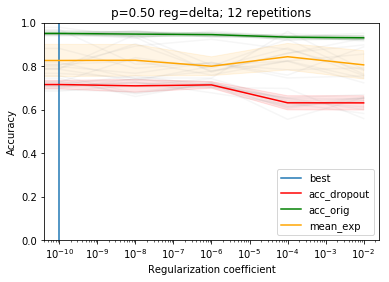

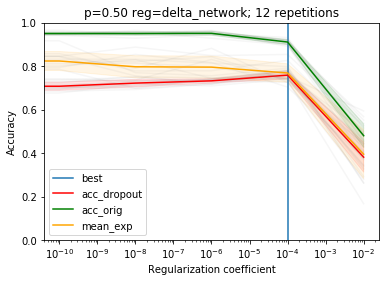

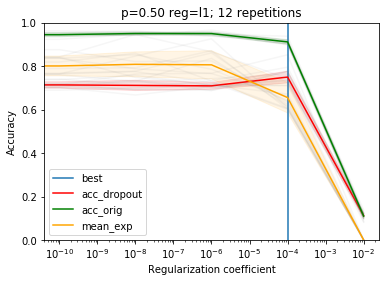

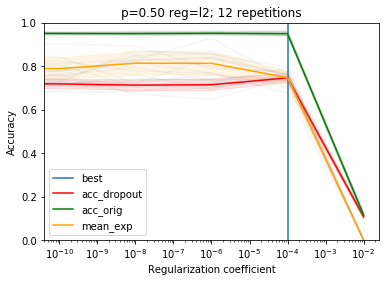

In [47]:
# loop over p
for p in pfirst_options:
    # loop over regularization types
    for reg in reg_type_options[:-1]:
        # reptitions for coefficients
        data = [trials[(p, reg, c)] for c in reg_coeff_options]
        
        # pyplot setup
        plt.figure()
        plt.title('p=%.2f reg=%s; %d repetitions' % (p, reg, len(data[0])))
        plt.xlabel('Regularization coefficient')
        plt.ylabel('Accuracy')
        plt.ylim((0, 1))
        
        # data for quantity
        d = [[rep[q_opt] for rep in trial] for trial in data]

        # means for quantity
        means = np.mean(d, axis = 1)

        # best index
        idx_best = np.argmax(means)
        
        # plotting best index
        plt.axvline(reg_coeff_options[idx_best], label = 'best')
        
        # loop over quantities
        for q in accs:
            # data for quantity: coefficient -> quantities
            d = [[rep[q] for rep in trial] for trial in data]
            
            means = np.mean(d, axis = 1)
            stds = np.std(d, axis = 1)
            
            # plotting repetitions in gray
            for trial in repetitions:
                plt.plot(reg_coeff_options, np.array(d)[:, trial], c = 'gray', alpha = 0.07)
                
            # plotting mean/std
            plt.plot(reg_coeff_options, means, c = colors[q], label = q)
            plt.fill_between(reg_coeff_options, means - stds, means + stds, alpha = 0.1, color = colors[q])
            
            # plotting best
            plt.plot()
            
            # saving quantities
            quantities[(p, reg, q)] = d[idx_best]
        plt.xscale('log')
        plt.legend()
        plt.show()

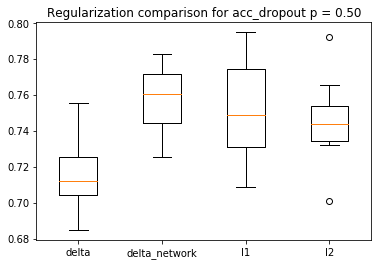

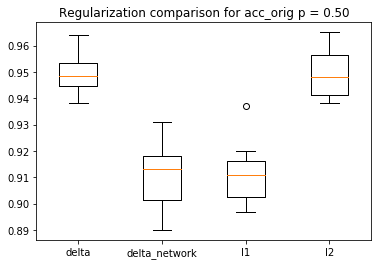

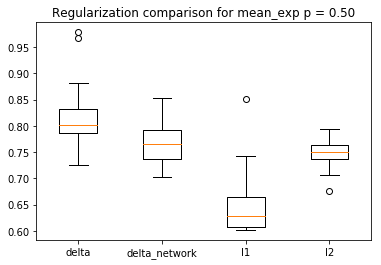

In [48]:
# loop over p
for p in pfirst_options:
    # loop over quantities
    for q in accs:
        plt.figure()
        plt.title('Regularization comparison for %s p = %.2f' % (q, p))
        # loop over regularization types
        regs = reg_type_options[:-1]
        vals = [quantities[p, reg, q] for reg in regs]
        plt.boxplot(vals, labels = regs)
        plt.show()